In [1]:
from os import listdir
from os.path import isfile, join
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math as math
from scipy.optimize import minimize
import scipy.stats as ss
from scipy.signal import find_peaks 
from matplotlib import rc
import codecs

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#en figur der fylder en kolonne har bredde 5,8, f.eks: fig, ax= plt.subplots(figsize=(5.8,4))
#en figur der fylder to kolonner har dobbeltbredde??

In [2]:
data = np.transpose(np.loadtxt('cross.txt',skiprows=30))

In [3]:
crossData = data[0]
enData = data[6]*1000
angData = data[8]

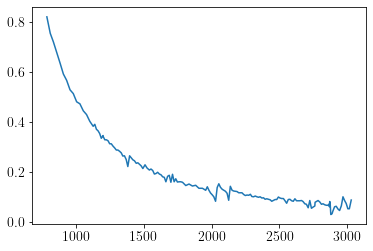

In [6]:
cross110 = []
en110 = []

for i in range(len(crossData)):
    if int(angData[i]) == 110:
        cross110.append(crossData[i])
        en110.append(enData[i])

plt.plot(en110,cross110)

In [76]:
c = 2.99792e8 # i m/s
hbar = 6.5821e-19 # i keV*s
a = 1/137.036
hbarc = 1.97327e-10

def cross(Ta,v):
    return (1*13*a*hbarc/(4*Ta*np.sin(v*(2*np.pi)/360/2)**2))**2*1e4

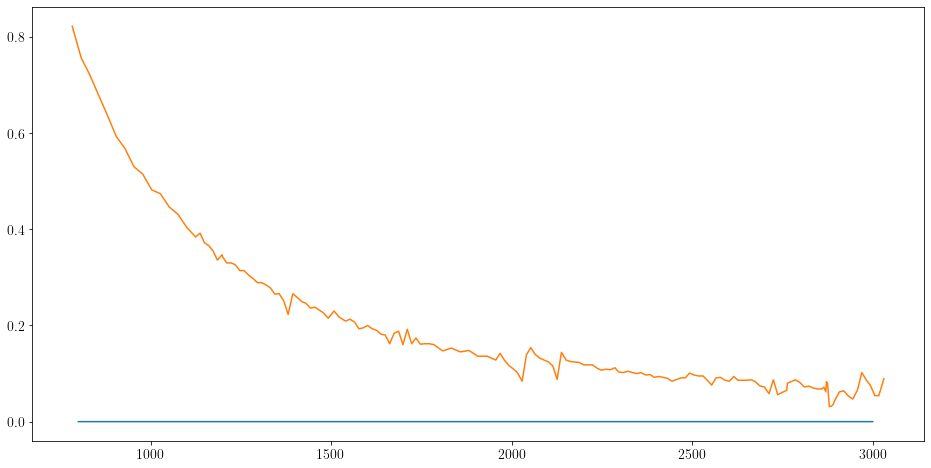

In [77]:
Ts = np.linspace(800,3000,2000)
plt.figure(figsize = (16,8))
plt.plot(Ts,cross(Ts,110))
plt.plot(en110,cross110)

In [78]:
data = np.transpose(np.loadtxt('rates.txt', skiprows=1))
counts = data[0]
solid = data[1]
energy = data[3]
times = data[4]/1000 #divider med 1000 for at få tid i s
currents = data[5]/times

In [79]:
times

array([701.12 , 186.257, 239.529])

In [80]:
#for #1 blev der angiveligt kørt ved ca. 0,5 nA, svarer til ca 3.12e9 protoner per sekund. Det ville derfor give
#mening hvis currents skal ganges med 10^8

#i stedet er der lavet en kalibrering: 106.7 counts svarer til en nC. Dvs 1 count svarer til 1/106.7 nC. Svarer til 
#5.85e7 elementery charges

In [81]:
currents = currents*5.85e7

In [82]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

dnts = []
for i in range(len(counts)):
    indexWhereEnergy = find_nearest(enData, energy[i])
    crossAtEn = crossData[indexWhereEnergy]*1e-24
    dnt = counts[i]/times[i] * 1/currents[i]*1/(cross*solid[i]) #cross(energy[i],110)
    dnts.append(dnt)
dnts = np.array(dnts)
mold = dnts/6.022e23 #mol pr cm²
gd = 27*mold #g pr cm²

In [83]:
gd

array([1.44914867e-05, 2.25975545e-05, 1.73506642e-05])

In [84]:
#for at få tykkelse, divider med densiteten af alu

In [85]:
gd/(2.7)/100*1e9

array([53.67217288, 83.69464619, 64.26171935])

In [86]:
crossData

array([1.064, 0.911, 0.822, ..., 0.053, 0.058, 0.052])

In [87]:
cross(energy[0],110)

1.214837380982239e-25

In [88]:
crossData[indexWhereEnergy]*1e-24

1.2799999999999998e-25